<span style="font-size:24px; font-weight:bold;">Introduction</span>

This notebook focuses on classifying stars, galaxies, and quasars based on their spectral characteristics. To achieve this, Support Vector Machine (SVM)
and Random Forest algorithms are employed. Since the dataset is imbalanced, the Synthetic Minority Oversampling Technique (SMOTE) is applied to balance 
the class distribution. Additionally, Local Outlier Factor (LOF) is used to detect and remove outliers. Out of the 16 available features, only those 
with a correlation greater than 0.16 with the class label are selected for classification. For data visualization, both the Seaborn and Yellowbrick
libraries are utilized.

<img src="star_galaxy_quasar.png" alt="Galaxy Image" width="500">

First let us understand what the core classes of our data mean:

-Star: A massive, luminous ball of gas that shines due to its internal energy sources, stars are held together by their own gravity and produce energy through nuclear fusion.

-Galaxy: A galaxy is a massive collection of stars, planets, gas, dust, and dark matter held together by gravity.

-Quasar: Quasars are a subclass of active galactic nuclei (AGNs), extremely luminous galactic cores where gas and dust falling into a supermassive black hole emit electromagnetic radiation across the entire electromagnetic spectrum.


<span style="font-size:24px; font-weight:bold;">Importing Necessary Libraries</span>

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-size:24px; font-weight:bold;">Loading the Dataset</span>

In [9]:
df= pd.read_csv("star_classification.csv")

In [10]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [12]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [13]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [14]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [15]:
df.shape

(100000, 18)

In [16]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [17]:
# Converting categorical data into numeric values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

<span style="font-size:24px; font-weight:bold;">Performing EDA</span>

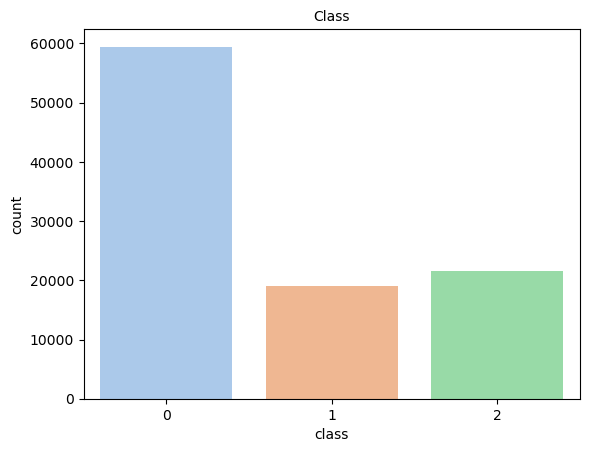

In [19]:
# Visualizing the distribution of different categories
fig, ax = plt.subplots()
sns.countplot(x=df["class"], hue=df["class"], palette="pastel", ax=ax, legend=False)
ax.set_title("Class", fontsize=10)
plt.show()

([<matplotlib.patches.Wedge at 0x1a657cf70b0>,
 [Text(-0.3216272247940852, 1.051929621348907, 'GALAXY'),
  Text(-0.3239728189314008, -1.0512095949874325, 'STAR'),
  Text(0.9105454841380407, -0.6171765722350625, 'QSO')],
 [Text(-0.1754330317058646, 0.5737797934630402, '59%'),
  Text(-0.17671244668985497, -0.5733870518113268, '22%'),
  Text(0.49666117316620395, -0.33664176667367046, '19%')])

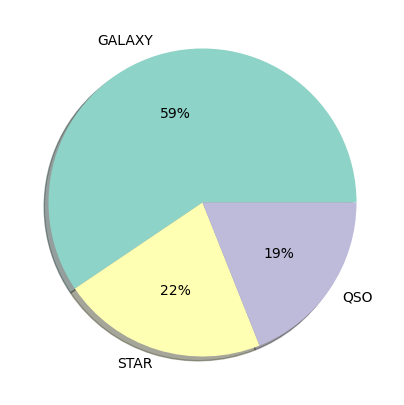

In [20]:
# Piechart
plt.figure(figsize=(5,5))
plt.pie(x=df['class'].value_counts(),labels=["GALAXY","STAR","QSO"],colors=sns.color_palette('Set3'),autopct="%1.f%%",shadow=True)

Hence, we can see that there is class imbalance in our data.

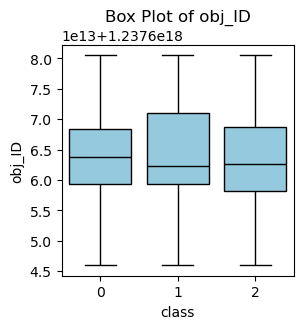

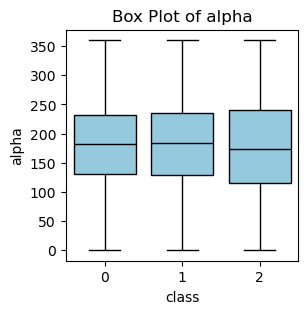

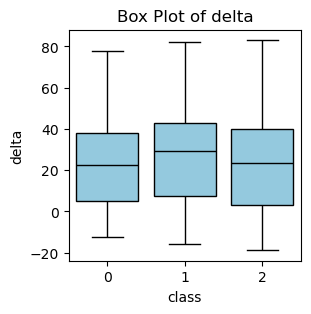

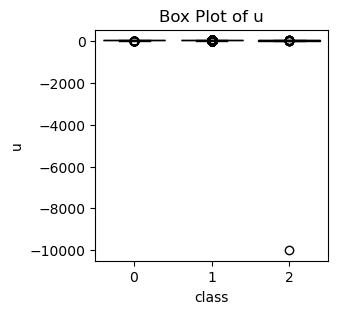

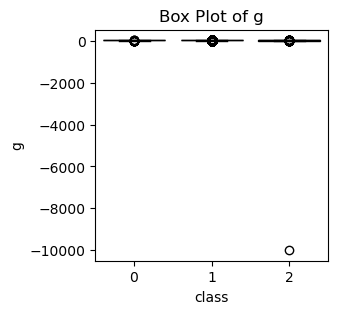

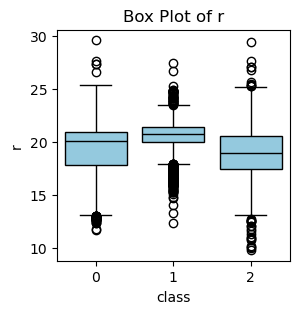

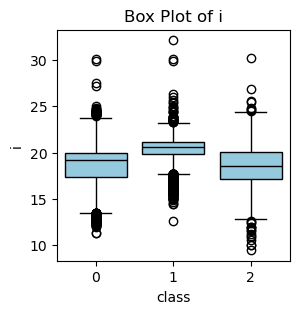

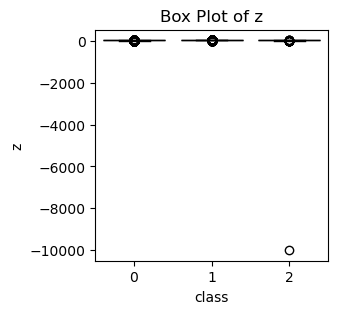

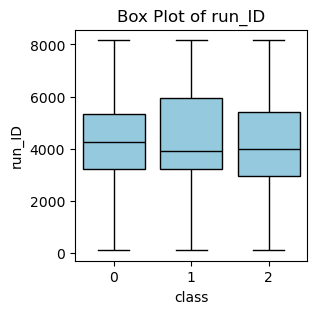

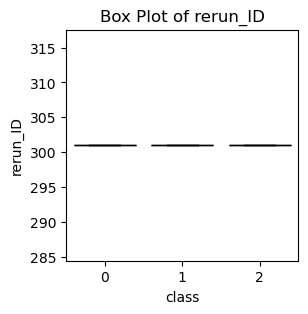

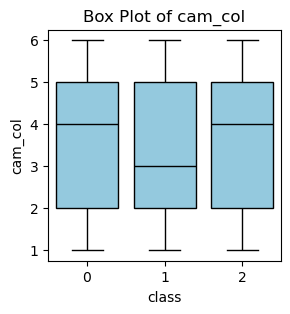

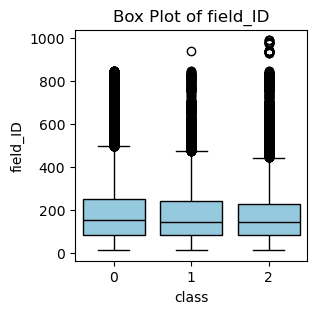

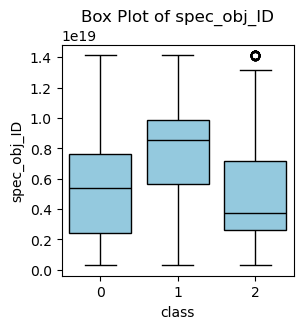

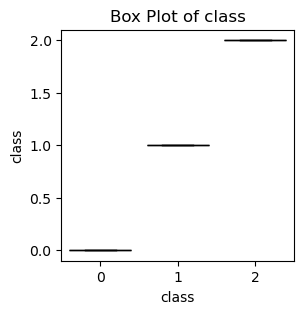

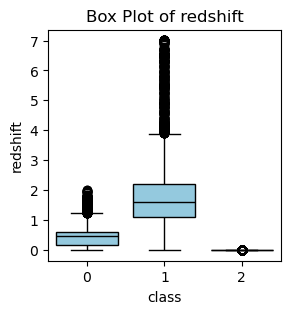

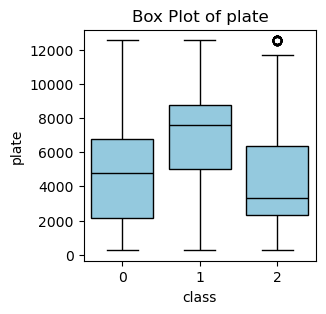

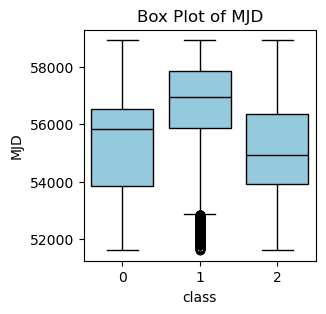

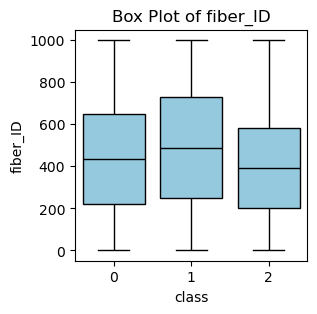

In [22]:
# Box plots

for column in df:

    plt.figure(figsize=(3, 3))

    sns.boxplot(data=df,x='class',y=column,color='skyblue',linecolor='black')

    plt.title(f'Box Plot of {column}')

    plt.show()

-Outliers are identified as points lying beyond the whiskers of the boxplot.

-Boxplot compare distributions across different groups.

-Boxplot identify the skewness of a dataset.

-Redshift seems to be a highly distinguishing feature between the classes, especially with class 1 having a significantly higher spread.

-Magnitude features(u,g,r,i,z) show significant outliers in class 2, could be more informative for stellar object classification

-alpha and delta are less important might be less useful due to similar distributions across classes

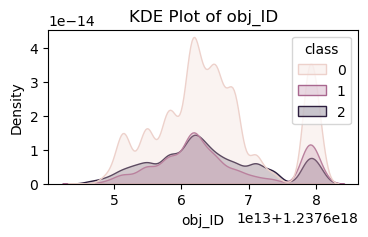

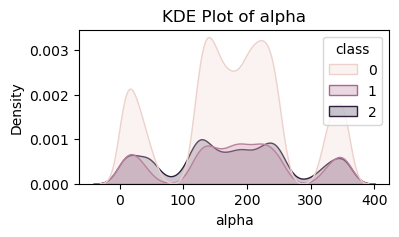

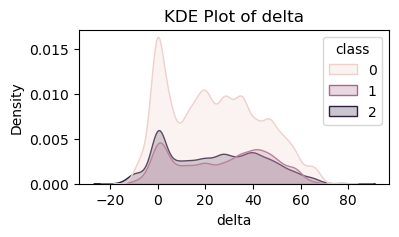

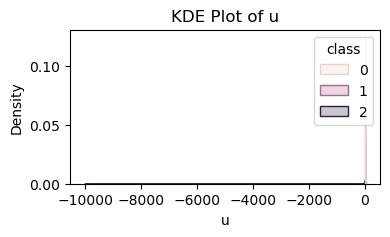

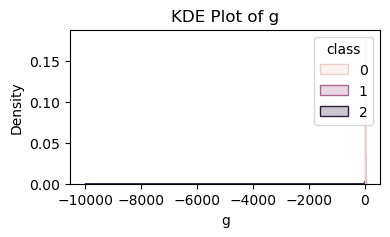

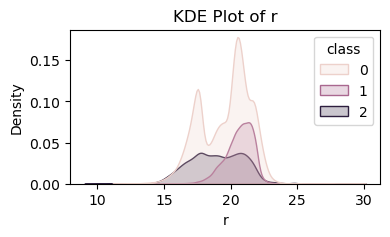

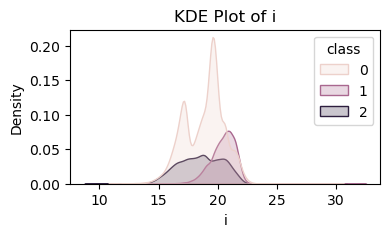

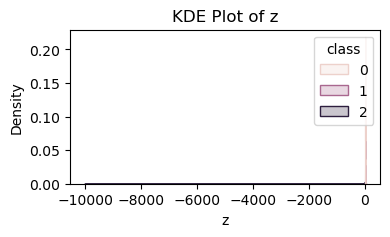

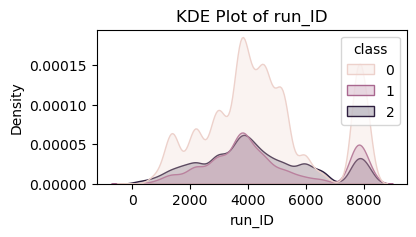

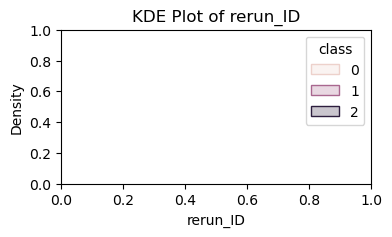

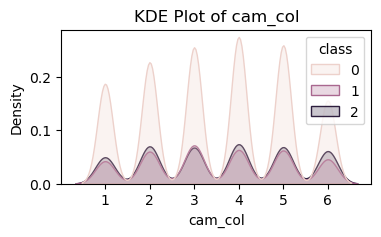

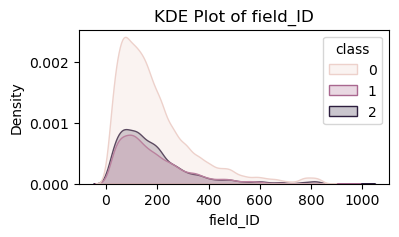

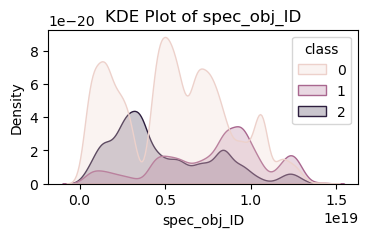

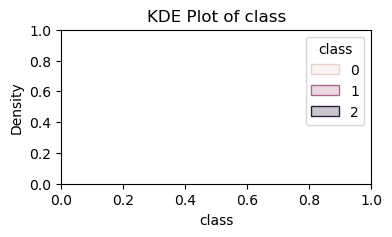

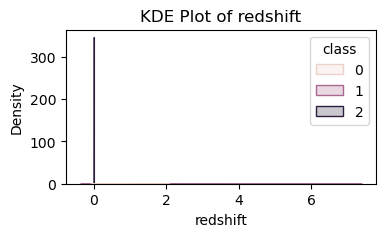

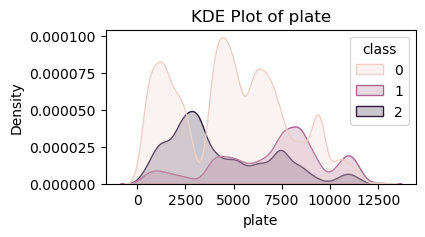

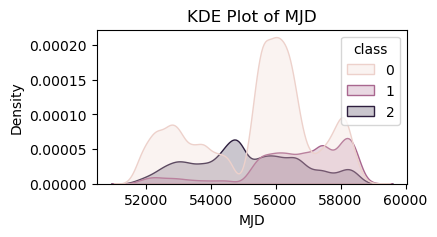

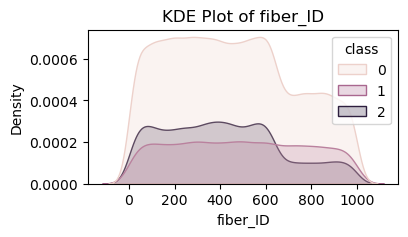

In [23]:
# KDE plot
for column in df:

    plt.figure(figsize=(4, 2))

    sns.kdeplot(data = df,x=column,hue = 'class',fill=True,warn_singular=False)

    plt.title(f'KDE Plot of {column}')

    plt.show()

-The u,g,r,i,z magnitudes are valuables differentiating the classes. 

<span style="font-size:24px; font-weight:bold;">Outlier detection using the Local Outlier Factor (LOF)</span>

In [25]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [26]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [27]:
len(outlier_index)

15256

In [28]:
df.drop(outlier_index, inplace=True)

<span style="font-size:24px; font-weight:bold;">Feature Selection</span>

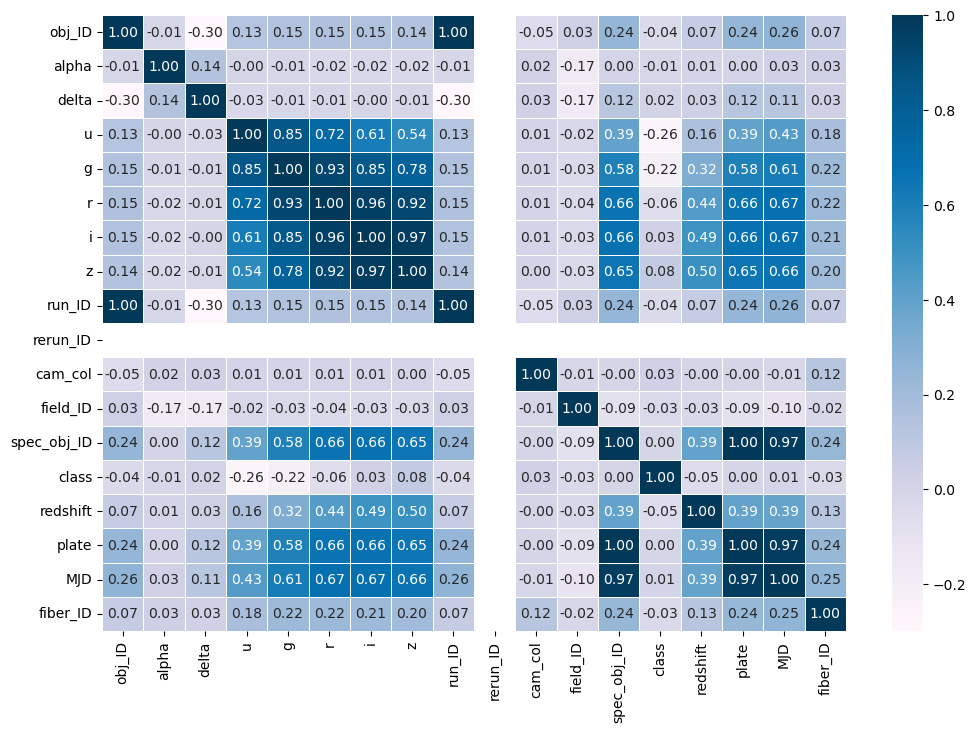

In [30]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

-Features that have a high correlation coefficient are often redundant.

-The magnitude features (u,g,r,i,z) are strongly interdependent and highly correlated to each other.

-magnitudes and redshifts show weak correlations with class.

-redshift is moderately correlated with photometric magnitudes.

-IDs like (obj_ID, run_ID, cam_col,etc) do not provide much information for classification.

In [31]:
corr = df.corr()

In [32]:
corr["class"].sort_values()

u             -0.263310
g             -0.216012
r             -0.061318
redshift      -0.045683
run_ID        -0.035732
obj_ID        -0.035729
field_ID      -0.032323
fiber_ID      -0.031727
alpha         -0.013221
spec_obj_ID    0.000059
plate          0.000060
MJD            0.007185
delta          0.015855
cam_col        0.030236
i              0.030689
z              0.081337
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [33]:
# Dropping the features that don't contribute to classification
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID','spec_obj_ID'], axis = 1)

<span style="font-size:24px; font-weight:bold;">Handling Imbalanced Dataset using the SMOTE Technique</span>

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [36]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [37]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 50695, 2: 17890, 1: 16159})
Resampled dataset shape Counter({0: 50695, 1: 50695, 2: 50695})


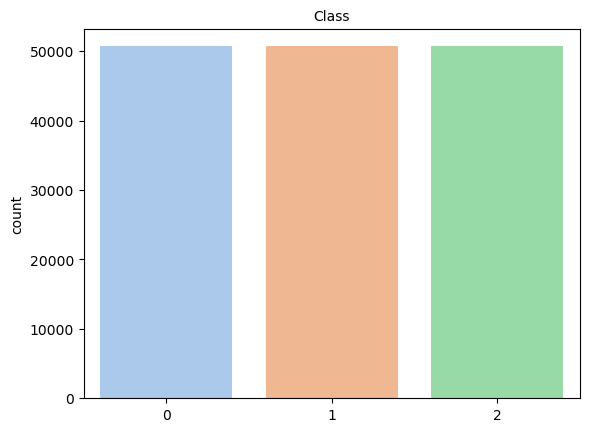

In [38]:
fig, ax = plt.subplots()
sns.countplot(x=y, hue=y, palette="pastel", ax=ax, legend=False)
ax.set_title("Class", fontsize=10)
plt.show()

<span style="font-size:24px; font-weight:bold;">Feature Scaling</span>

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

<span style="font-size:24px; font-weight:bold;">Importing few necessary libraries</span>

In [42]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

<span style="font-size:24px; font-weight:bold;">Splitting the data</span>

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

<span style="font-size:24px; font-weight:bold;">SVM Classifier</span>

In [47]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.971


In [48]:
classes = ['GALAXY','STAR','QSO']

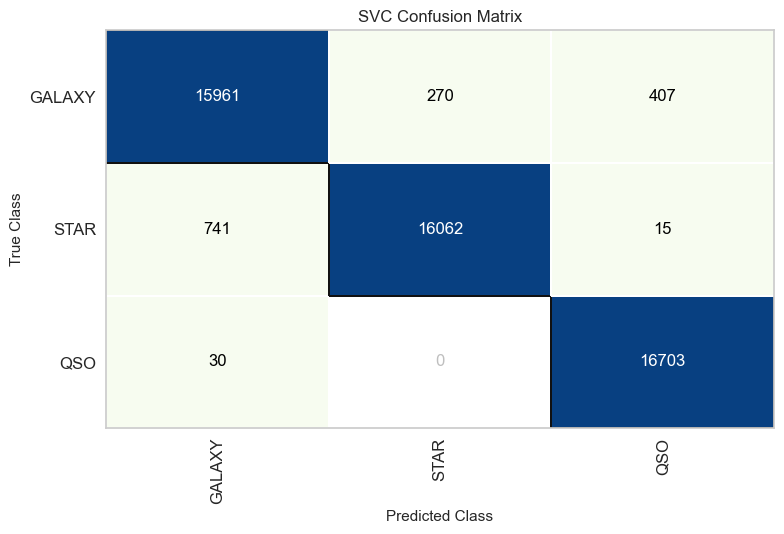

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [49]:
# Confusion Matrix
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='GnBu')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [50]:
# Classification Report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     16638
           1       0.98      0.96      0.97     16818
           2       0.98      1.00      0.99     16733

    accuracy                           0.97     50189
   macro avg       0.97      0.97      0.97     50189
weighted avg       0.97      0.97      0.97     50189



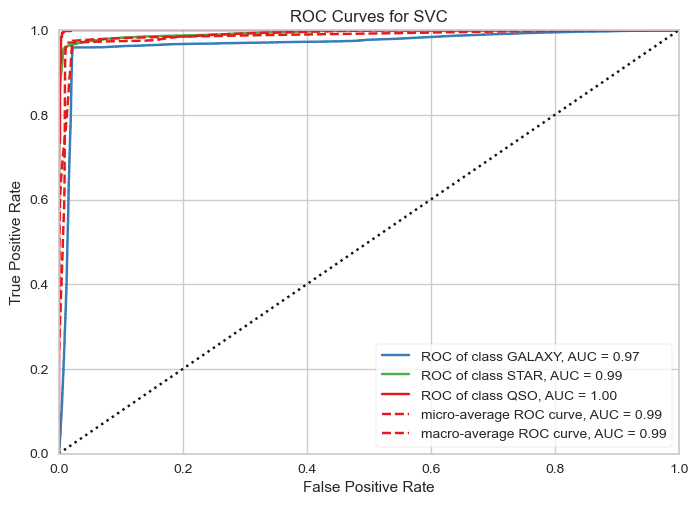

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
# ROC Curve
visualizer = ROCAUC(svm_clf, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show() 

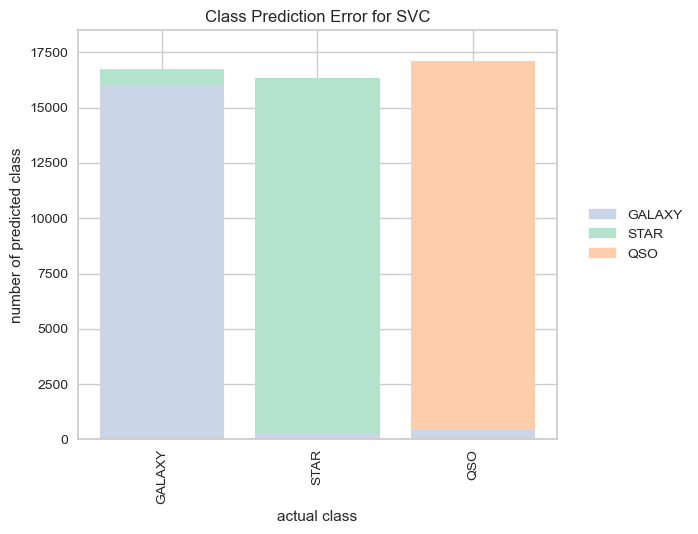

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [52]:
# Class prediction Error
visualizer = ClassPredictionError(svm_clf, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()

Results for Support Vector Classifier Model:

ACCURACY  OF SVC : 97%
1. GALAXY (True Class GALAXY):
  Correct Predictions: 15961 (Predicted as GALAXY)
  Misclassified as STAR: 270
  Misclassified as QSO: 407


2. STAR( True Class Star):
  Correct Predictions: 16062(Predicted as STAR)
  Missclassified as GALAXY: 741
  Missclassified as QSO: 15

3. QSO(True Class QSO):
 Correct Predictions: 16703 (Predicted as QSO)
 Missclassified as GALAXY:30
 Missclassified as STAR: 0


<span style="font-size:24px; font-weight:bold;">Random Forest Classifier</span>

In [54]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.983


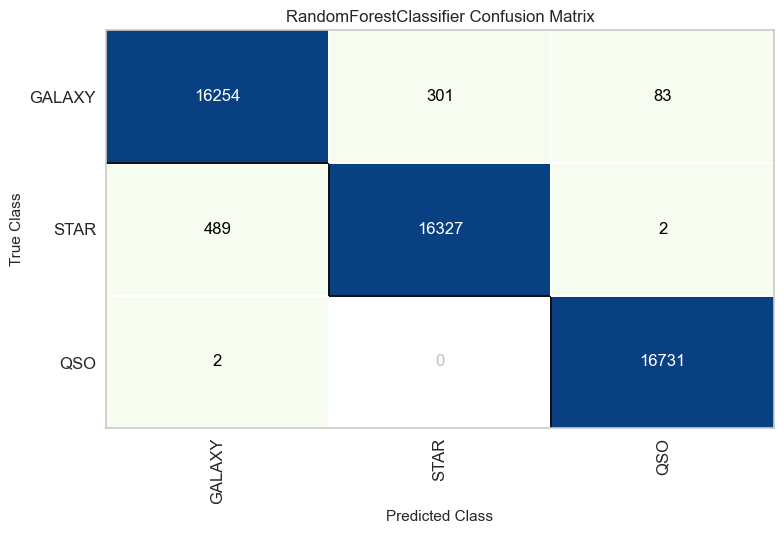

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
# Confusion Matrix
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

In [56]:
# Classification Report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     16638
           1       0.98      0.97      0.98     16818
           2       0.99      1.00      1.00     16733

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189



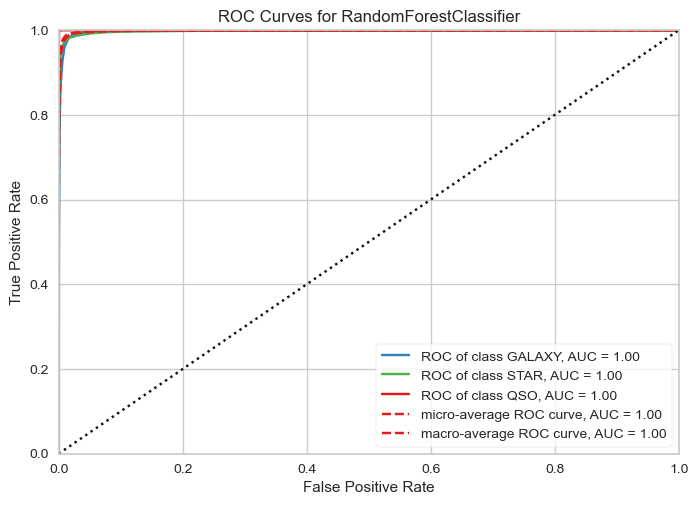

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
# ROC Curve
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

set_palette('bold')

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)        
visualizer.show()

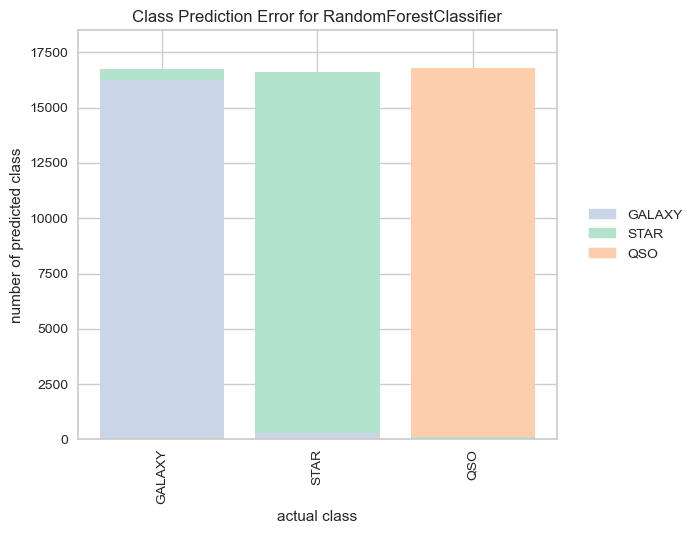

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [58]:
# Class Prediction Error
visualizer = ClassPredictionError(r_forest, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()

Results for Random Forest Classifier Model:

ACCURACY  OF  RFC: 98%

1. GALAXY (True Class GALAXY):
  Correct Predictions: 16265 (Predicted as GALAXY)
  Misclassified as STAR: 297
  Misclassified as QSO: 76

2. STAR( True Class Star):
  Correct Predictions: 16334(Predicted as STAR)
  Misclassified as GALAXY: 482
  Misclassified as QSO: 2

3. QSO(True Class QSO):
 Correct Predictions: 16730(Predicted as QSO)
 Misclassified as GALAXY:3
 Misclassified as STAR: 0


<span style="font-size:24px; font-weight:bold;">Conclusion</span>

-The Random Forest Classifier (RFC) outperforms other models by effectively minimizing misclassifications, particularly for the STAR and GALAXY classes. It achieves consistently higher accuracy across all classes, establishing it as the preferred choice.

-This emphasizes the role of machine learning and data science in stellar object classification and reflects on emerging technologies enhancing our understanding of the universe.
